# 1. Prepare the workstation

In [33]:
import numpy as np
import pandas as pd
#conda install -c conda-forge ipympl

df = pd.read_csv('lego.csv')

df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.9900,2,277,4.0,0,20
1,19,19.9900,2,168,4.0,2,20
2,19,12.9900,11,74,4.3,2,20
3,5,99.9900,23,1032,3.6,0,20
4,5,79.9900,14,744,3.2,1,20
...,...,...,...,...,...,...,...
12256,23,36.5878,6,341,4.4,2,19
12257,23,24.3878,8,217,4.1,2,19
12258,23,24.3878,18,233,4.6,2,19
12259,20,12.1878,1,48,5.0,4,19


# 2. Evaluate the variables

In [34]:
df.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
count,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,16.68828,65.141998,14.603050,493.405921,3.709689,1.988826,10.015333
std,8.21868,91.980429,34.356847,825.364580,1.641130,1.787565,6.185450
min,0.00000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11.00000,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000
50%,19.00000,36.587800,4.000000,216.000000,4.400000,2.000000,10.000000
75%,23.00000,70.192200,11.000000,544.000000,4.700000,4.000000,15.000000
max,30.00000,1104.870000,367.000000,7541.000000,5.000000,5.000000,20.000000


# 3. Drop uneeded columns

In [35]:

print(len(df['review_difficulty'].unique()))

6


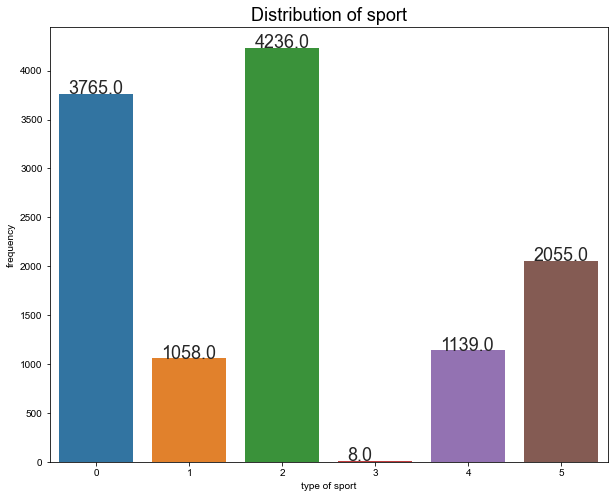

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
ax = sns.countplot(x='review_difficulty', data= df)
sns.set(font_scale=1.5)
sns.set_style('white')

plt.title('Distribution of sport')
plt.xlabel('type of sport')
plt.ylabel('frequency')

# [4] Annotate the bars with values:
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50), va='center') 


# 4. Specify the target variable

In [36]:
X = df
y = df['review_difficulty']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['review_difficulty']= le.fit_transform(df['review_difficulty'])

y = le.transform(y)


In [37]:
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


# 5. Normalise the data set

In [38]:
x_cols = X.columns

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

X = pd.DataFrame(X, columns=[x_cols])

X.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,0.633333,0.025138,0.005450,0.036605,0.80,0.0,1.0
1,0.633333,0.016069,0.005450,0.022149,0.80,0.4,1.0
2,0.633333,0.009720,0.029973,0.009682,0.86,0.4,1.0
3,0.166667,0.088625,0.062670,0.136737,0.72,0.0,1.0
4,0.166667,0.070486,0.038147,0.098541,0.64,0.2,1.0


# 6. Apply the clustering algorithm

In [39]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [40]:
kmeans.cluster_centers_

array([[5.84659128e-01, 6.28371571e-02, 4.74007660e-02, 7.40832024e-02,
        8.76740105e-01, 2.85026321e-01, 5.00394814e-01],
       [4.10916958e-01, 2.72256199e-02, 8.14854013e-04, 2.03540843e-02,
        5.15726410e-02, 9.75137294e-01, 5.02670994e-01]])

In [41]:
kmeans.inertia_

3319.9526034268365

# 7. Evaluate the output

In [42]:
# [1] Extract the labels from the k means.
labels = kmeans.labels_

# [2] Add up correctly labelled instances. 

correct_labels = sum(y == labels)

# [3] Display the result.
print("Result: %a out of %a samples were correctly labeled."% (correct_labels, y.size))

print(' Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 3765 out of 12261 samples were correctly labeled.
 Accuracy score: 0.31


# 8. Improve the accuracy (elbow method)


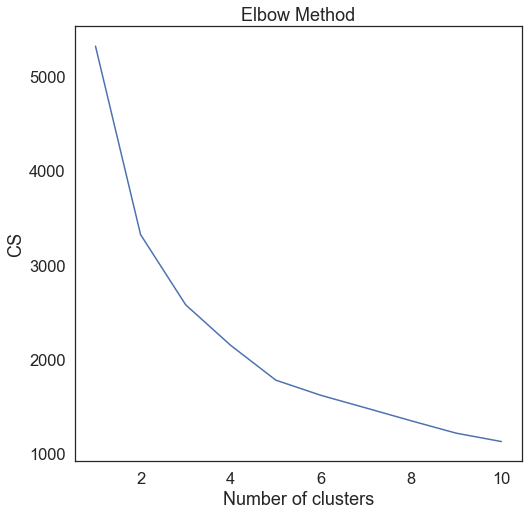

In [43]:
fig = plt.figure(figsize=(8, 8))

cs = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter=300, n_init = 10, random_state=0)
    kmeans.fit_predict(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11), cs)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [44]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [45]:
kmeans.inertia_

2574.710717009938

In [46]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

# [3] Display the result.
print("Result: %d out of %d samples were correctly labeled."% (correct_labels, y.size))

print(' Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 3974 out of 12261 samples were correctly labeled.
 Accuracy score: 0.32


# 9. Visualise the clusters

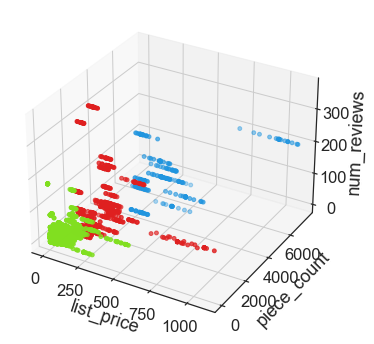

In [49]:
#intercative 3d plot of the clusters
# list_price, piece_count, num_reviews

colors = ['#DF2020', '#81DF20', '#2095DF']
df['cluster'] = kmeans.fit_predict(df[['list_price', 'piece_count', 'num_reviews']])
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.list_price, df.piece_count, df.num_reviews, c=df.c, s=15)
ax.set_xlabel('list_price')
ax.set_ylabel('piece_count')
ax.set_zlabel('num_reviews')
plt.show()

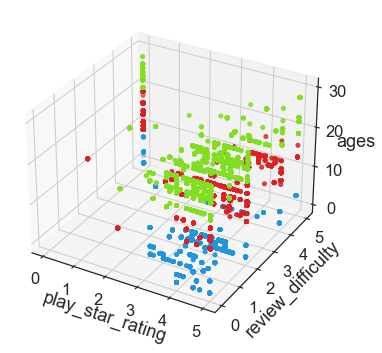

In [50]:
#intercative 3d plot of the clusters
# play_star_rating, review_difficulty, ages
from mpl_toolkits.mplot3d import Axes3D

colors = ['#DF2020', '#81DF20', '#2095DF']
df['cluster'] = kmeans.fit_predict(df[['play_star_rating', 'review_difficulty', 'ages']])
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.play_star_rating, df.review_difficulty, df.ages, c=df.c, s=15)
ax.set_xlabel('play_star_rating')
ax.set_ylabel('review_difficulty')
ax.set_zlabel('ages')
plt.show()

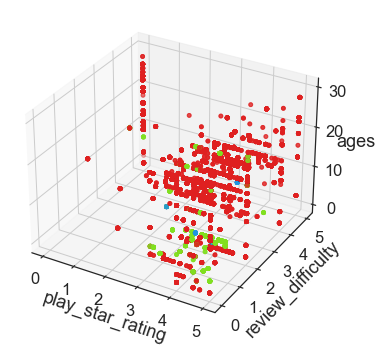

In [51]:
#intercative 3d plot of the clusters
# country, num_reviews, list_price
from mpl_toolkits.mplot3d import Axes3D

colors = ['#DF2020', '#81DF20', '#2095DF']
df['cluster'] = kmeans.fit_predict(df[['country', 'num_reviews', 'list_price']])
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.play_star_rating, df.review_difficulty, df.ages, c=df.c, s=15)
ax.set_xlabel('play_star_rating')
ax.set_ylabel('review_difficulty')
ax.set_zlabel('ages')
plt.show()